# **Workshop 5 (Wherry)**

In this workshop, you'll looking at evaluation metrics and hyperparameter turning.

# 0) Loading Data and Libraries

In [6]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
# we're using the Diabetes dataset from sklearn.datasets
from sklearn import datasets
# Remember you have to run this cell block before continuing!

# set a seed for reproducibility
random_seed = 25
np.random.seed(random_seed)

# 1) Evaluation Metrics

## 1.1) Meet the Metrics (Follow)

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# This is a dummy dataset that contains 500 positive and 500 negative samples
X,Y = make_classification(n_samples=1000,n_features=4,flip_y=0,random_state=random_seed)

test_data_fraction = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_data_fraction,  random_state=random_seed)

In [8]:
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
#sum(Y)/len(Y)

In [9]:
# BEGIN SOLUTION
print(f'Accuracy: {sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)}')
print(f'Precision Macro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="macro")}')
print(f'Recall Macro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="macro")}')
print(f'F1 Macro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="macro") }')

Accuracy: 0.92
Precision Macro: 0.9184393588063313
Recall Macro: 0.9201336167628302
F1 Macro: 0.9191919191919192


In [10]:
# Since the datset is balanced in term of class distribution, all of the micro scores are the same as the accuracy
print(f'Precision Micro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="micro")}')
print(f'Recall Micro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="micro")}')
print(f'F1 Micro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="micro") }')

Precision Micro: 0.92
Recall Micro: 0.92
F1 Micro: 0.92


Sklearn also has a [built in function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that will give a handy summary of all the popular classification metrics. You can use this for the later questions.

The first few values on the first column (before accuracy, macro avg, etc.) are the class values.

In [11]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_test_predicted,digits=4))

              precision    recall  f1-score   support

           0     0.9358    0.9189    0.9273       111
           1     0.9011    0.9213    0.9111        89

    accuracy                         0.9200       200
   macro avg     0.9184    0.9201    0.9192       200
weighted avg     0.9203    0.9200    0.9201       200



In [12]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

           0     0.9907    0.9550    0.9725       111
           1     0.9462    0.9888    0.9670        89

    accuracy                         0.9700       200
   macro avg     0.9684    0.9719    0.9698       200
weighted avg     0.9709    0.9700    0.9701       200



In [13]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

           0     0.9537    0.9279    0.9406       111
           1     0.9130    0.9438    0.9282        89

    accuracy                         0.9350       200
   macro avg     0.9334    0.9359    0.9344       200
weighted avg     0.9356    0.9350    0.9351       200



In [14]:
import warnings
warnings.filterwarnings('ignore')

# Dummy Classifier (Picks the majority class. Every time.)
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       111
           1     0.4450    1.0000    0.6159        89

    accuracy                         0.4450       200
   macro avg     0.2225    0.5000    0.3080       200
weighted avg     0.1980    0.4450    0.2741       200



## 1.2) Imbalanced data (Group)

In [15]:
# Load the data
# Read the breast cancer dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [16]:
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's take a look at the ratio of class values in the dataset.

In [17]:
bc_data["target"].value_counts()

target
1.0    357
0.0    212
Name: count, dtype: int64

As we can see, it's around a 60/40 split. What effect do you think this will have on the various evaluation metrics?

**Discuss Here**

Now run the evaluation metrics as like above for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [18]:
from sklearn.metrics import classification_report

In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
#sum(Y)/len(Y)
print(classification_report(Y_test,Y_test_predicted,digits=4))

              precision    recall  f1-score   support

         0.0     0.9167    0.8462    0.8800        39
         1.0     0.9231    0.9600    0.9412        75

    accuracy                         0.9211       114
   macro avg     0.9199    0.9031    0.9106       114
weighted avg     0.9209    0.9211    0.9202       114



In [20]:
# K-Nearest Neighbor Classifier
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
# AdaBoost Classifier
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

In [ ]:
# Dummy Classifier
import warnings
warnings.filterwarnings('ignore')

# Dummy Classifier (Picks the majority class. Every time.)
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

In terms of evaluation metrics, how did each model perform? Discuss

**Discuss**

## 1.3) Multiclass Data (Group)

Now, we'll be looking at the wine dataset.

In [21]:
# Read the iris dataset and translate to pandas dataframe
wine_sk = datasets.load_wine()
# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data'], wine_sk['target']],columns= wine_sk['feature_names'] + ['target'])

In [28]:
from sklearn.model_selection import train_test_split
# The fraction of data that will be test data
test_data_fraction = 0.1

wine_features = wine_data.iloc[:,0:-1]
wine_labels = wine_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(wine_features, wine_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's check the distribution of the dataset

In [29]:
wine_data["target"].value_counts()

target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64

The [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) is useful for getting a broad overview of how your classifier handled certain classes.

In [24]:
from sklearn.metrics import confusion_matrix

# Now create a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_predicted)

ValueError: Found input variables with inconsistent numbers of samples: [18, 114]

Now run the evaluation metrics as like above for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [ ]:
# Decision Tree


In [ ]:
# K-Nearest Neighbor Classifier


In [ ]:
# AdaBoost Classifier


In [ ]:
# Dummy Classifier


In terms of evaluation metrics, how did each model perform? Discuss

Discuss here

# 2) Cross Validation and Hyperparmeter Tuning

## 2.1) Basic Cross Validation (Follow)

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
# Initialize a k-fold splitter
kf = KFold(n_splits=3)

In [30]:
# Kf.split() allows you to iterate though the different folds
# "train_index" are the indecies of the training data in that fold
# "test_index" are the indicies of the testing data in that fold
print(len(X_train))
for train_index, test_index in kf.split(X_train):
    print("Train: ", train_index)
    print("Test: ", test_index)
    print("----")

160
Train:  [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
Test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]
----
Train:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 1

## 2.2) Hyperparameter Tuning with CV (Group)

We did some very basic HP Tuning last workshop. However, one of the main issues is that we did HP tuning by testing our HPs againt the test dataset. It's good practice not to touch your dataset at all until you've finished selecting your model completly. Therefore, in this exercise we'll be trying out different HPs by constructing validation sets from our training data.

The dataset we'll be using for this exercise is the breast cancer dataset, which is used to tell if a certain individal might have breast cancer or not.

In [31]:
# Load the data
# Read the wine dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [32]:
# Formatting our data
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

In [50]:
def k_fold_accuracy(k, model, X_data, Y_data):
    
    # Init k-fold splitter
    kf = KFold(n_splits=k)
    scores = []
    
    #use kf.split to split the train data into train and validation data
    #train_index, test_index = kf.split(X_data)

    #iterate through all possible folds and fit the folded training data to the model
    #use the validation data to predict on the model
    #compute the accuracy score and append it to scores
    for train_index, test_index in kf.split(X_data):
        X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
        Y_train, Y_test = Y_data.iloc[train_index], Y_data.iloc[test_index]
        model.fit(X_train, Y_train)
        Y_test_predicted = model.predict(X_test)
        scores.append(sklearn.metrics.accuracy_score(Y_test, Y_test_predicted))
    

    return scores

In [ ]:
for train_index, test_index in kf.split(X_data):
        
        # Splits the given data into a training/validation set
        k_X_train, k_X_valid = X_data.iloc[train_index], X_data.iloc[test_index]
        k_Y_train, k_Y_valid = Y_data.iloc[train_index], Y_data.iloc[test_index]

        # Fits and runs the model
        model_fit = model.fit(X=k_X_train.values, y=k_Y_train.values)
        k_Y_valid_predicted=model_fit.predict(k_X_valid.values)

        acc_score = sklearn.metrics.accuracy_score(k_Y_valid, k_Y_valid_predicted)
        scores.append(acc_score)

In [51]:
# Testing K-fold
k = 3
model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed)


In [52]:
per_fold_acc = k_fold_accuracy(k, model, X_train, Y_train)
print(per_fold_acc)
np.mean(per_fold_acc)

[0.9539473684210527, 0.9605263157894737, 0.9205298013245033]


0.9450011618450098

There also exists a built in sklearn function for this, however it is import to know how to perform your own k-fold cross validation split if you want to implement a custom evaluation metric.

In [53]:
from sklearn import metrics
# We're using the trianing dataset here, but remember that CV will
# split that data into training and validation sets for each fold
# so we get an "unbiased" estimate of our test performance.
per_fold_acc = cross_val_score(model, X_train.values, Y_train.values, cv=KFold(n_splits=k), scoring='accuracy')
print(per_fold_acc)
np.mean(per_fold_acc)

[0.95394737 0.96052632 0.9205298 ]


0.9450011618450098

## 2.3 Tuning (Group)

In this problem you are going to select the best hypterparameter, using *only the training dataset*. No peaking at the test dataset. To estimate how well a given hyperparameter value will do on *unseen* data, we can use Crossvalidation (within the training dataset) to evaluate our model.

You should:
1. Iterate over all ccp_alpha values
2. Calculate the k_fold validation accuracy using the above funciton
3. Calculate the training accuracy and the validation accuracy
4. Plot both accuracies vs. the ccp_alpha value

Text(0, 0.5, 'Average Accuracy of 5-fold validation')

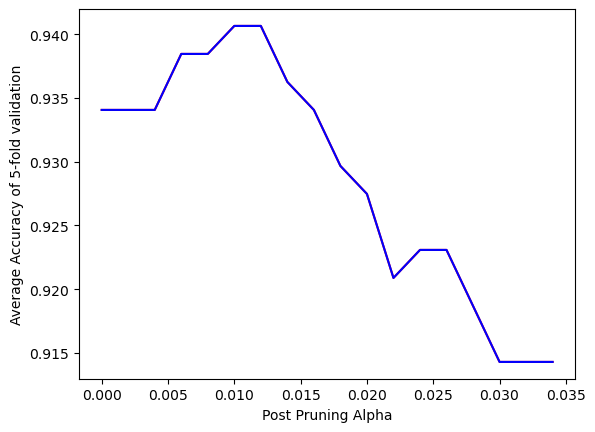

In [55]:
from sklearn.metrics import accuracy_score

# np.arange generates a list that starts at minimum, ends at maximum, and increments by step
alpha_values = np.arange(0, 0.035, 0.002)

# two lists to hold our accuracy
k = 5
valid_accs = []
train_accs = []

# Put your solution here!
# You should:
# 1. Iterate over all ccp_alpha values
for alpha in alpha_values:
    # 2. Calculate the k_fold validation accuracy using the above funciton
    model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=alpha)
    per_fold_acc = k_fold_accuracy(k, model, X_train, Y_train)
    
    # 3. Calculate the training accuracy 
    train_accs.append(np.mean(per_fold_acc))
    # and the validation accuracy
    valid_accs.append(np.mean(per_fold_acc))
    
# 4. Plot both accuracies vs. the ccp_alpha value
plt.plot(alpha_values, valid_accs, color='red')
plt.plot(alpha_values, train_accs, color='blue')
plt.xlabel("Post Pruning Alpha")
plt.ylabel(f'Average Accuracy of {k}-fold validation')

The following code selects the alpha value for the best model. Then you job is to train a new model (using all of the training data), using your best hyperparameter value. Then evaluate it on the test dataset. What is the accuracy, precision, recall and F1 Score?

Text(0, 0.5, 'Average Accuracy of 5-fold validation')

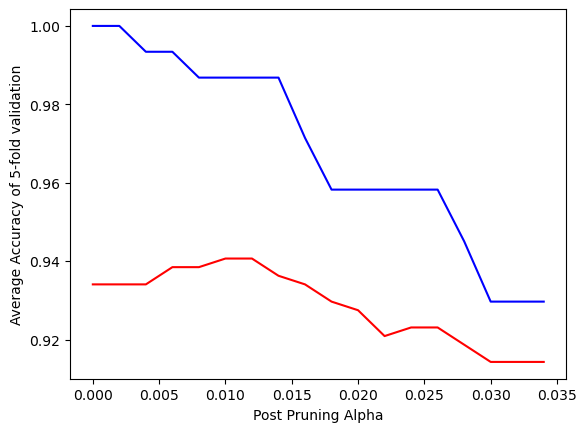

In [59]:
from sklearn.metrics import accuracy_score

# np.arange generates a list that starts at minimum, ends at maximum, and increments by step
alpha_values = np.arange(0, 0.035, 0.002)

# two lists to hold our accuracy
k = 5
valid_accs = []
train_accs = []

for ccp_alpha in alpha_values:
    # at every ccp_alpha value, get the training and test accuracy
    model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=ccp_alpha)
    valid_acc = np.mean(k_fold_accuracy(k, model, X_train, Y_train))
    valid_accs.append(valid_acc)
    train_accs.append(accuracy_score(Y_train, model.fit(X_train.values, Y_train.values).predict(X_train.values)))
# END SOLUTION

# 4. Plot both accuracies vs. the ccp_alpha value
plt.plot(alpha_values, valid_accs, color='red')
plt.plot(alpha_values, train_accs, color='blue')
plt.xlabel("Post Pruning Alpha")
plt.ylabel(f'Average Accuracy of {k}-fold validation')

In [58]:
# Take the alpha for the model with the best accuracy on the *validation* set!
best_alpha = alpha_values[np.argmax(valid_accs)]
best_alpha

0.01

In [67]:
print(X_train.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


[Text(0.4090909090909091, 0.9, 'worst perimeter <= 0.284\ngini = 0.471\nsamples = 455\nvalue = [173, 282]\nclass = benign'),
 Text(0.18181818181818182, 0.7, 'worst concave points <= 0.546\ngini = 0.09\nsamples = 276\nvalue = [13, 263]\nclass = benign'),
 Text(0.09090909090909091, 0.5, 'gini = 0.037\nsamples = 267\nvalue = [5, 262]\nclass = benign'),
 Text(0.2727272727272727, 0.5, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = malignant'),
 Text(0.6363636363636364, 0.7, 'worst texture <= 0.23\ngini = 0.19\nsamples = 179\nvalue = [160, 19]\nclass = malignant'),
 Text(0.45454545454545453, 0.5, 'worst radius <= 0.354\ngini = 0.444\nsamples = 18\nvalue = [6, 12]\nclass = benign'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = benign'),
 Text(0.5454545454545454, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = malignant'),
 Text(0.8181818181818182, 0.5, 'mean concave points <= 0.243\ngini = 0.083\nsamples = 161\nvalue = [154, 7]\nclass = malig

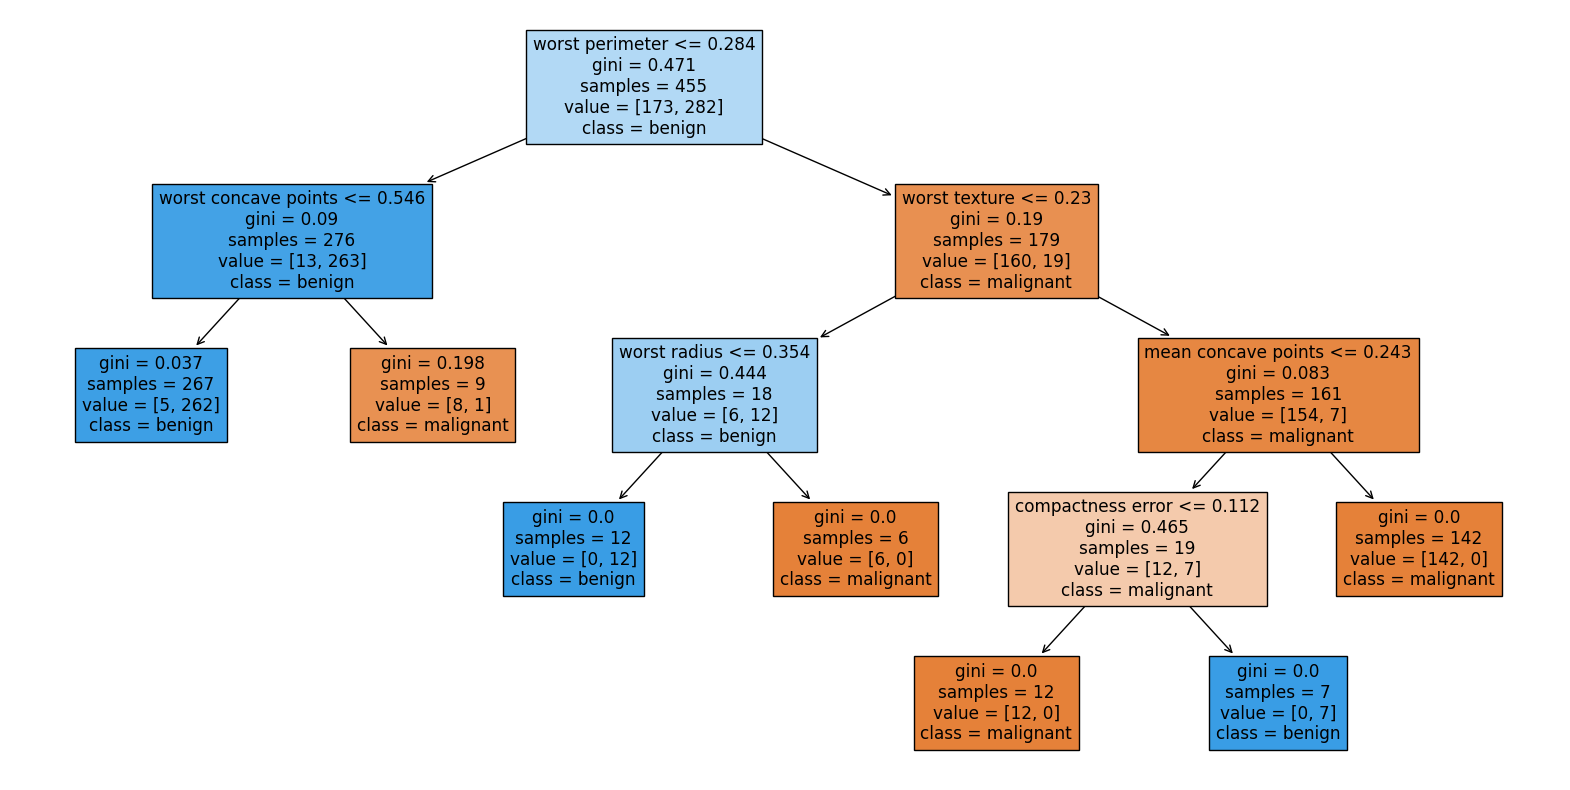

In [69]:
from sklearn.tree import plot_tree

# Train your model here. You may want to print the tree using plot_tree
# SOLUTION
model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha)
model.fit(X_train, Y_train)
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_train.columns.tolist(), class_names=["malignant", "benign"])



In [ ]:
# Now evaluate your model on the test dataset - what are the evaluation metrics?
# SOLUTION


# 3) ROC Curves

Sklearn has some built in methods for [plotting ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

### 3.1) Plotting ROC Curves (Group)

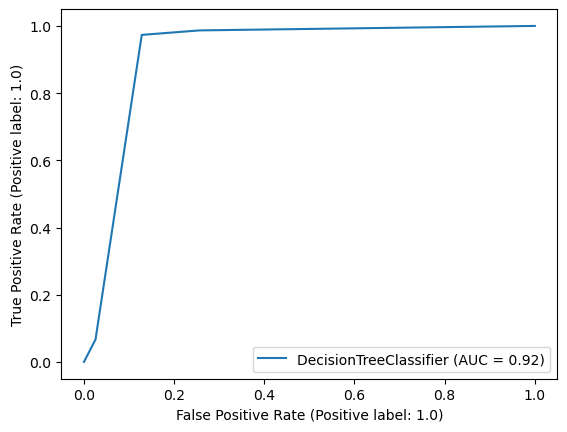

In [60]:
# First make an ROC curve for the model you selected with HP tuning
from sklearn.metrics import RocCurveDisplay

gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha).fit(X=X_train.values, y=Y_train.values)
RocCurveDisplay.from_estimator(gini_tree,X_test.values,Y_test.values)

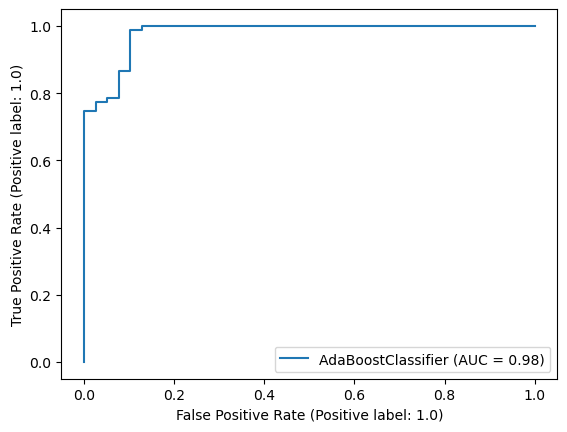

In [61]:
# Now, make an ROC curve with an AdaBoostClassifier with n_estimators=100

#SOLUTION
ada_class = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train.values, y=Y_train.values)
RocCurveDisplay.from_estimator(ada_class,X_test.values,Y_test.values)

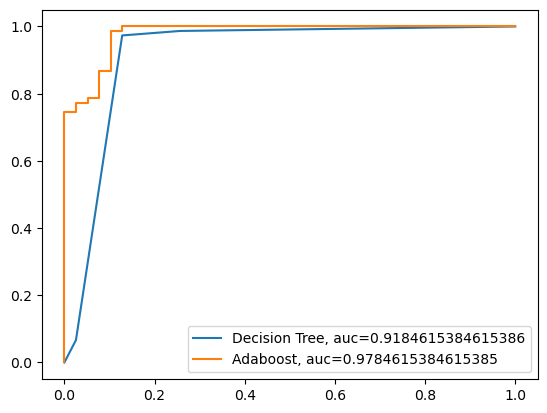

In [63]:
plt.figure(0).clf()

# When predicting, we have to ask for *continuous* values, not 0/1, so we use predict_proba
# We use [:,1] to get the predictions for the positive class
tree_predictions = gini_tree.predict_proba(X_test.values)[:,1]
fpr, tpr, thresh = metrics.roc_curve(Y_test.values, tree_predictions)
auc = metrics.roc_auc_score(Y_test.values, tree_predictions)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

adaboost_predictions = ada_class.predict_proba(X_test.values)[:,1]
fpr, tpr, thresh = metrics.roc_curve(Y_test.values, adaboost_predictions)
auc = metrics.roc_auc_score(Y_test.values, adaboost_predictions)
plt.plot(fpr,tpr,label="Adaboost, auc="+str(auc))

plt.legend(loc=0)

### 3.2) Intepreting ROC curves (Group)

Take a look at the above ROC curves. How are they similar? How do they differ? Is one strictly better than the other? In what situations is one better than the other? Discuss with your group.

**Take notes of your discussion here.**